## **By using Keras as deep learning**

In [392]:
# import the required libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [404]:

# Load the dataset from titanic.csv and make a Dataframe

data = pd.DataFrame(pd.read_csv("titanic.csv"))
data = data.drop(columns=["Name","Ticket"])

In [394]:

encorder = LabelEncoder()                                                   # Label Encorder to encode the columns like 1 for male and 0 for female

data["Sex"] = encorder.fit_transform(data["Sex"])
data["Embarked"] = encorder.fit_transform(data["Embarked"])
data["Cabin"] = encorder.fit_transform(data["Cabin"])
columns = ["Cabin", "Fare", "Age"]

for i in columns:                                                           # Cleaning the NaN values from the dataframe
    data[i] = pd.to_numeric(data[i], errors="coerce")
    mean_value = data[i].mean()
    data[i] = data[i].fillna(mean_value)

data = data[data["Embarked"] != 2]                                          # There is 3 group in this column so i remove one classifier from the column

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,0,38.000000,1,0,71.2833,81,0
5,6,0,3,1,29.699118,0,0,8.4583,147,1
9,10,1,2,0,14.000000,1,0,30.0708,147,0
16,17,0,3,1,2.000000,4,1,29.1250,147,1
19,20,1,3,0,29.699118,0,0,7.2250,147,0
...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,0,15.000000,0,0,7.2250,147,0
879,880,1,1,0,56.000000,0,1,83.1583,70,0
885,886,0,3,0,39.000000,0,5,29.1250,147,1
889,890,1,1,1,26.000000,0,0,30.0000,60,0


#### **Spliting the data into X and y**

In [395]:
y = data[["Embarked","Survived"]]                                               # Taking two features in y embarced and survived
X = data.drop(columns=["Survived","Embarked"])                                  # Rest of all columns store in X

scaler = StandardScaler()                                                       # scaler use to set all the values on same scale

x_scale = scaler.fit_transform(X)                                               # Scaling
y_scale = scaler.fit_transform(y)

## **Model Training**

In [396]:
model = Sequential()                                                            # Model use for deep learning alogrithms

model.add(Dense(16,input_dim = X.shape[1],activation='relu'))                   # Add input layer(input_dim is no of features)

model.add(Dense(32, activation='relu'))                                         # Add hidden layer with activation function

model.add(Dense(2,activation='sigmoid'))                                        # use 2 neuron represent the number of target values

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # Compile the model, means give model the function in which it put and check the values + deal with errors

In [398]:
model.fit(x_scale,y_scale,epochs=10)                                            # Then fit the values into the model

loss,accuracy_neural = model.evaluate(X,y)                                      # Evaluate mean i think it works like predictions functions we use in scikit

print(f'Accuracy: ',round(accuracy_neural*100,0),'%')                           # printing the accuracy

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 0.6390 - accuracy: 0.3522
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5500 - accuracy: 0.4656
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.5142
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.5385
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.5749
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.6032
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1744 - accuracy: 0.6316
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0996 - accuracy: 0.6721
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.6883
Epoch 10/10
8/8 [==============================] - 0s 8ms/step - loss: 120.3454 - accuracy: 0.6235
Accuracy:  62.0 %


## **Do by using scikit-learn**

##### **by using the same data from above after droping and removing null values**

In [399]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Train the Model**

In [400]:
y = y.drop(columns=["Embarked"])                                                                # In y take only one column as target because in scikit we take only 1 feature as y

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)              # Testing and spliting the data into 80% and 20%

X_train_scale = scaler.fit_transform(X_train)                                                   # Again scaling for scikit data to do them on same scale
X_test_scale = scaler.fit_transform(X_test)

In [401]:
perceptron = Perceptron(eta0=0.1,max_iter=100)                                                 # Model used is name as Perceptron (also NN model)

perceptron.fit(X_train_scale,y_train)                                                          # Fit in the values
predictions = perceptron.predict(X_test_scale)

accuracy_scikit = accuracy_score(y_test,predictions)                                           # Built in function to check the accuracy of the Perceptron

print(f'Accuracy: {round(accuracy_scikit*100,0)}%')

Accuracy: 70.0%


/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [402]:
import matplotlib.pyplot as plt                                                                # Library used for making graphs

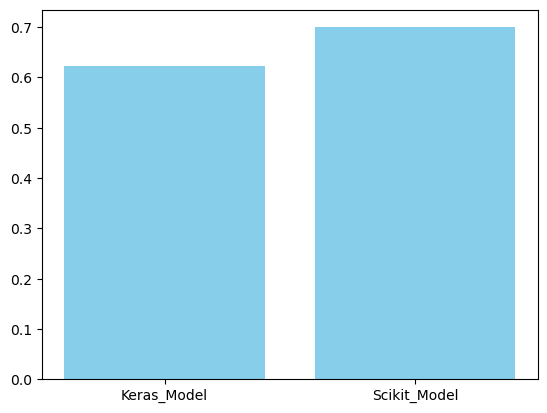

In [403]:
models_name = ["Keras_Model","Scikit_Model"]                                                    # Models name store in list to give as a parameter to graph function

accuracies = [accuracy_neural,accuracy_scikit]                                                  # Do same with both of the accuracies of the models

plt.bar(models_name,accuracies,color='skyblue')                                                 # Function used to make a bar graph
plt.show()